<h2> Analysis Highlights: </h2>
<h4> This analysis will be using logistic regression, SVC and XGBoost models, and changing threshold to acquire the impact results on recall and f1 scores, which are important to fraud detection applications, and reduces the occurrence of false negatives.</h4>

#### Load the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_test = pd.read_csv(r'C:\Users\Jey\Documents\Analyst Dataset\CreditCard_fraudTest.csv')
df_train = pd.read_csv(r'C:\Users\Jey\Documents\Analyst Dataset\CreditCard_fraudTrain.csv')

In [3]:
print(len(df_test), len(df_train))

555719 1296675


In [4]:
#combine both data dataframes, test and train by joining union operation
df = pd.concat([df_train, df_test])
len(df)

1852394

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### Data Understanding and Exploration

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='is_fraud'>

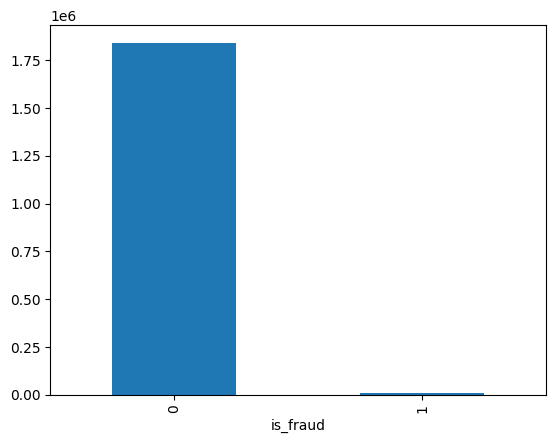

In [7]:
df.groupby('is_fraud').count()['cc_num'].plot.bar()

* Summary, the number of fraudulent transactions is much smaller, which leads the model to predict non faudulent (0) with higher performance than fraud (1) transaction

In [8]:
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]
print(len(fraud), len(non_fraud))

9651 1842743


In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [11]:
#checking distinct
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [12]:
#checking for null/NAN and duplicated cells
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum()

0

<AxesSubplot:>

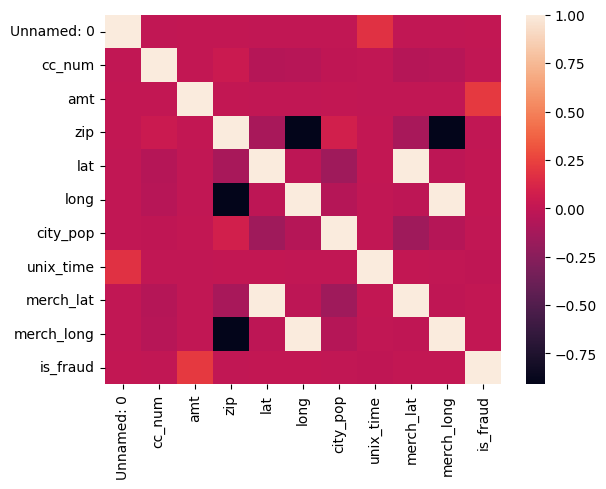

In [14]:
sns.heatmap(df[[i for i in df.columns
               if df[i].dtype == 'int64' or df[i].dtype == 'float64']].corr())

#### Data Preparation

In [15]:
#Balancing the dataset
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state = 50)])

In [16]:
df_balanced.shape

(19302, 23)

<AxesSubplot:xlabel='is_fraud'>

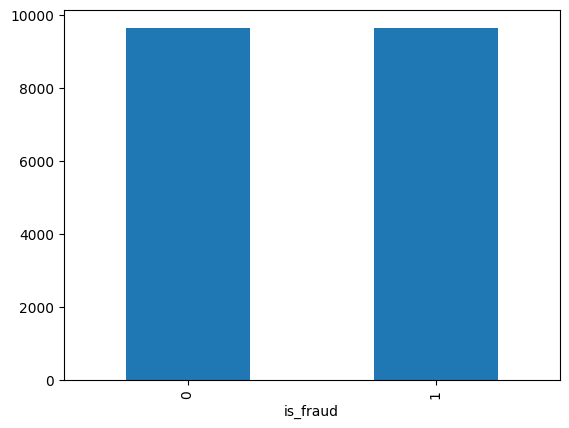

In [17]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()

In [18]:
#Dropping columns
columns_dropped = ['Unnamed: 0', 'merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip']
df_balanced.drop(columns = columns_dropped, inplace = True)

In [19]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 2449 to 211478
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   city                   19302 non-null  object 
 4   state                  19302 non-null  object 
 5   lat                    19302 non-null  float64
 6   long                   19302 non-null  float64
 7   city_pop               19302 non-null  int64  
 8   dob                    19302 non-null  object 
 9   is_fraud               19302 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


In [20]:
#Coverting datetimes type for 'trans_date_trans_time'
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])

In [21]:
#Coverting datetimes type for 'dob'
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])

In [22]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 2449 to 211478
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  19302 non-null  datetime64[ns]
 1   category               19302 non-null  object        
 2   amt                    19302 non-null  float64       
 3   city                   19302 non-null  object        
 4   state                  19302 non-null  object        
 5   lat                    19302 non-null  float64       
 6   long                   19302 non-null  float64       
 7   city_pop               19302 non-null  int64         
 8   dob                    19302 non-null  datetime64[ns]
 9   is_fraud               19302 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [23]:
#Using the datetime variables allows extract of day, hour and age from transaction and client
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [24]:
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time':'hour_transaction'})

In [25]:
df_balanced.head(5)

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,1,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,1,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,3,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,3,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,3,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [26]:
#Function to get time of day
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 19:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 19:
        ans = 'night'
    return ans

In [27]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [28]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [29]:
df_balanced['dob'] = df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob':'age'})

In [30]:
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']

In [31]:
#Analyzing how many frauds occur for each age group
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
19      7
20     32
21     21
22     12
23     58
       ..
96     41
97     54
98     33
99     11
100     7
Name: is_fraud, Length: 82, dtype: int64

In [32]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 2449 to 211478
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  19302 non-null  object 
 1   category          19302 non-null  object 
 2   amt               19302 non-null  float64
 3   city              19302 non-null  object 
 4   state             19302 non-null  object 
 5   lat               19302 non-null  float64
 6   long              19302 non-null  float64
 7   city_pop          19302 non-null  int64  
 8   age               19302 non-null  int64  
 9   is_fraud          19302 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.6+ MB


#### Label Encoding

In [34]:
#Using label encoding for categorical data
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'
                      or df_balanced[i].dtype == 'int32' or df_balanced[i].dtype == 'float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [35]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [36]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [37]:
from sklearn.preprocessing import OrdinalEncoder
#Assign all categorial value with unique value
encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [38]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,733.0,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,733.0,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,733.0,43.0,29.4400,-98.4590,1595797,64,1


In [39]:
#Correcting datatypes
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

<AxesSubplot:>

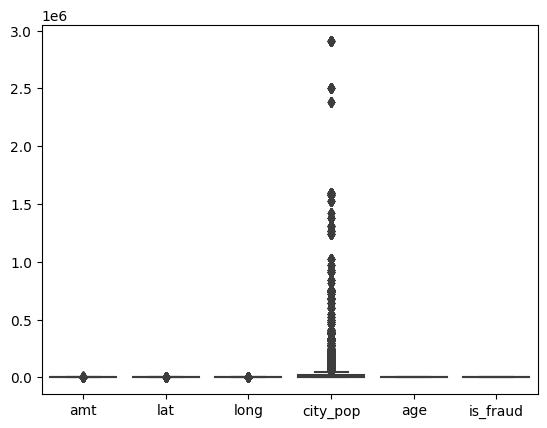

In [40]:
#Scaling dataset using SVM
sns.boxplot(df_balanced[NUMERICAL_FEATURES])

<AxesSubplot:>

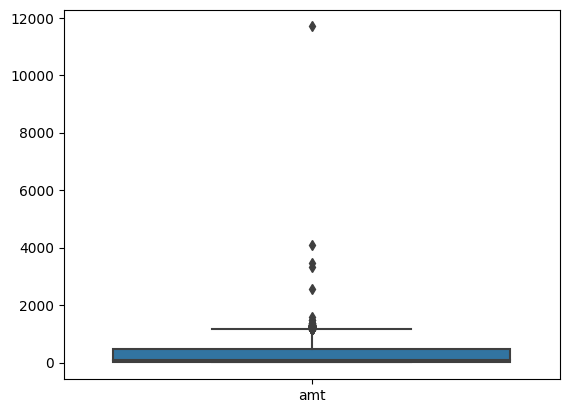

In [41]:
sns.boxplot(df_balanced[['amt']])

* not all of them seems to follow gaussian normal distribution, sing normal minmax scaler next

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [44]:
last_column = df_scaled.shape[1]-1

In [45]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 9651
Fraud: 9651


In [46]:
df_scaled.rename(columns = {last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.023949,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.000900,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.023543,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000516,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.023493,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0


#### Modeling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [48]:
#x = feature values, all the columns except the last column
x = df_scaled.drop(columns = 'is_fraud')

#y = target values, last column of the data frame
y = df_scaled['is_fraud']

In [50]:
# pliting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

#### Logistic Regression Model

In [51]:
#Training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
#Define a function to get the predictions and setting up the threshold
def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["predict_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [53]:
#Use 0.4 as threshold for LR model
predict(model, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,predict_threshold
2107,1.0,0.615385,0.068271,0.901657,0.08,0.390338,0.437545,0.000108,0.629630,1.0,1.0
16459,0.5,0.846154,0.000134,0.875138,0.50,0.285644,0.784112,0.000654,0.555556,0.0,0.0
14423,0.0,0.769231,0.002103,0.697238,0.50,0.303691,0.780687,0.000094,0.543210,0.0,0.0
5765,1.0,0.846154,0.081779,0.342541,0.30,0.419338,0.813956,0.027160,0.456790,1.0,1.0
411,1.0,0.384615,0.001733,0.311602,0.28,0.381439,0.788449,0.000661,0.419753,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10003,0.0,0.000000,0.005339,0.046409,0.24,0.459641,0.719607,0.000693,0.419753,0.0,0.0
11220,0.5,0.692308,0.006672,0.071823,0.24,0.489091,0.737319,0.001035,0.506173,0.0,0.0
2376,1.0,0.307692,0.025949,0.236464,0.32,0.367225,0.705886,0.000199,0.580247,1.0,1.0
8047,1.0,0.923077,0.079921,0.325967,0.02,0.224385,0.791471,0.005375,0.703704,1.0,1.0


* The 'prediction' column is for standard threshold (0.5) and the 'pred_threshold' stands for our results with the changed threshold.

In [54]:
y_test = pd.DataFrame(y_test)

In [55]:
x_test["real"] = y_test["is_fraud"]

In [56]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,prediction,predict_threshold,real
2107,1.0,0.615385,0.068271,0.901657,0.08,0.390338,0.437545,0.000108,0.629630,1.0,1.0,1.0
16459,0.5,0.846154,0.000134,0.875138,0.50,0.285644,0.784112,0.000654,0.555556,0.0,0.0,0.0
14423,0.0,0.769231,0.002103,0.697238,0.50,0.303691,0.780687,0.000094,0.543210,0.0,0.0,0.0
5765,1.0,0.846154,0.081779,0.342541,0.30,0.419338,0.813956,0.027160,0.456790,1.0,1.0,1.0
411,1.0,0.384615,0.001733,0.311602,0.28,0.381439,0.788449,0.000661,0.419753,0.0,1.0,1.0


In [57]:
#With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      1939
         1.0       0.79      0.78      0.79      1922

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861



In [59]:
#With 0.4 threshold
print(classification_report(x_test['real'], x_test['predict_threshold']))

              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76      1939
         1.0       0.72      0.94      0.82      1922

    accuracy                           0.79      3861
   macro avg       0.82      0.79      0.79      3861
weighted avg       0.82      0.79      0.79      3861



* There is an improvement in the recall for frauds, which is now 0.94, but some other metrics such as precision got a little bit worse, whereas the F1-score overall got better.

In [60]:
#Define a function to get the confusion matrix
def confusion_matrix_plot(test_set, predict_label, model):
    cm = confusion_matrix(x_test['real'], x_test[predict_label], labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()

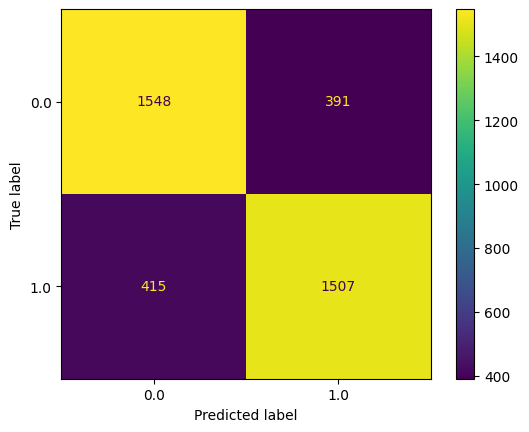

In [61]:
confusion_matrix_plot(x_test, 'prediction', model)

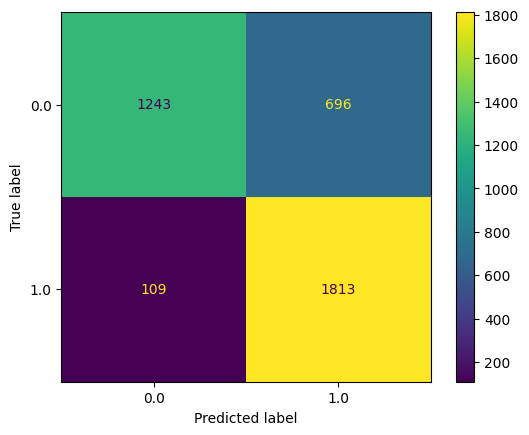

In [62]:
confusion_matrix_plot(x_test, 'predict_threshold', model)

* Predicting fraud transactions is getting better, but worse at predicting non fraud.

#### SVM Classifier Model

In [63]:
from sklearn.svm import SVC

In [64]:
model_SVM = SVC(probability = True, random_state=50)

In [65]:
model_SVM.fit(x_train, y_train)

SVC(probability=True, random_state=50)

In [67]:
#Drop last predictions
x_test = x_test.drop(columns = {'prediction','predict_threshold' ,'real'})

In [68]:
#Use 0.4 as threshold for LR model
predict(model_SVM, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,predict_threshold
2107,1.0,0.615385,0.068271,0.901657,0.08,0.390338,0.437545,0.000108,0.629630,1.0,1.0
16459,0.5,0.846154,0.000134,0.875138,0.50,0.285644,0.784112,0.000654,0.555556,0.0,0.0
14423,0.0,0.769231,0.002103,0.697238,0.50,0.303691,0.780687,0.000094,0.543210,0.0,0.0
5765,1.0,0.846154,0.081779,0.342541,0.30,0.419338,0.813956,0.027160,0.456790,1.0,1.0
411,1.0,0.384615,0.001733,0.311602,0.28,0.381439,0.788449,0.000661,0.419753,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10003,0.0,0.000000,0.005339,0.046409,0.24,0.459641,0.719607,0.000693,0.419753,0.0,0.0
11220,0.5,0.692308,0.006672,0.071823,0.24,0.489091,0.737319,0.001035,0.506173,0.0,0.0
2376,1.0,0.307692,0.025949,0.236464,0.32,0.367225,0.705886,0.000199,0.580247,1.0,1.0
8047,1.0,0.923077,0.079921,0.325967,0.02,0.224385,0.791471,0.005375,0.703704,1.0,1.0


In [69]:
x_test["real"] = y_test["is_fraud"]

#With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))
#With 0.4 threshold
print(classification_report(x_test['real'], x_test['predict_threshold']))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1939
         1.0       0.83      0.85      0.84      1922

    accuracy                           0.84      3861
   macro avg       0.84      0.84      0.84      3861
weighted avg       0.84      0.84      0.84      3861

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1939
         1.0       0.81      0.86      0.83      1922

    accuracy                           0.83      3861
   macro avg       0.83      0.83      0.83      3861
weighted avg       0.83      0.83      0.83      3861



* In this case, it's more of a balanced metrics, and little improvement in recall. The f1-score is somewhat similar to Logistic Regression Model

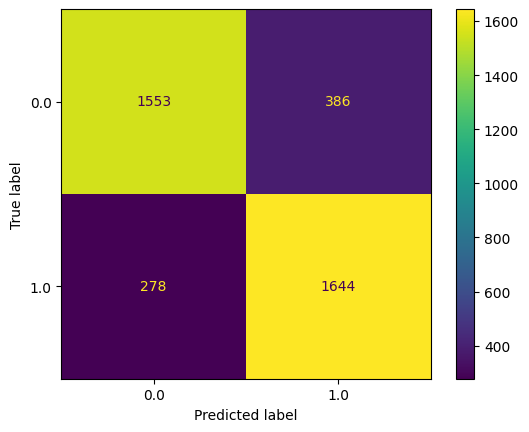

In [70]:
confusion_matrix_plot(x_test, 'predict_threshold', model_SVM)

#### XGBoost Model

In [73]:
#Compare LR and SVC
from xgboost import XGBClassifier

In [74]:
xgb = XGBClassifier(objective = 'binary:logistic')

In [76]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [77]:
#Drop again last predictions
x_test = x_test.drop(columns = {'prediction','predict_threshold' ,'real'})

In [78]:
#Experimenting 0.3 threshold for XGBoost model
predict(xgb, x_test, 0.3)

,0,1,2,3,4,5,6,7,8,prediction,predict_threshold
2107,1.0,0.615385,0.068271,0.901657,0.08,0.390338,0.437545,0.000108,0.629630,1,1.0
16459,0.5,0.846154,0.000134,0.875138,0.50,0.285644,0.784112,0.000654,0.555556,0,0.0
14423,0.0,0.769231,0.002103,0.697238,0.50,0.303691,0.780687,0.000094,0.543210,0,0.0
5765,1.0,0.846154,0.081779,0.342541,0.30,0.419338,0.813956,0.027160,0.456790,1,1.0
411,1.0,0.384615,0.001733,0.311602,0.28,0.381439,0.788449,0.000661,0.419753,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10003,0.0,0.000000,0.005339,0.046409,0.24,0.459641,0.719607,0.000693,0.419753,0,0.0
11220,0.5,0.692308,0.006672,0.071823,0.24,0.489091,0.737319,0.001035,0.506173,0,0.0
2376,1.0,0.307692,0.025949,0.236464,0.32,0.367225,0.705886,0.000199,0.580247,1,1.0
8047,1.0,0.923077,0.079921,0.325967,0.02,0.224385,0.791471,0.005375,0.703704,1,1.0


In [79]:
x_test["real"] = y_test["is_fraud"]
print(classification_report(x_test['real'], x_test['prediction']))
print(classification_report(x_test['real'], x_test['predict_threshold']))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1939
         1.0       0.97      0.97      0.97      1922

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1939
         1.0       0.96      0.99      0.98      1922

    accuracy                           0.98      3861
   macro avg       0.98      0.98      0.98      3861
weighted avg       0.98      0.98      0.98      3861



* XGBoost got overall some much better results than the previous models, and reducing the threshold to 0.3 results to lessen worse model, which implies that there is a different ROC (Receiver Operating Curve) behavior to this model

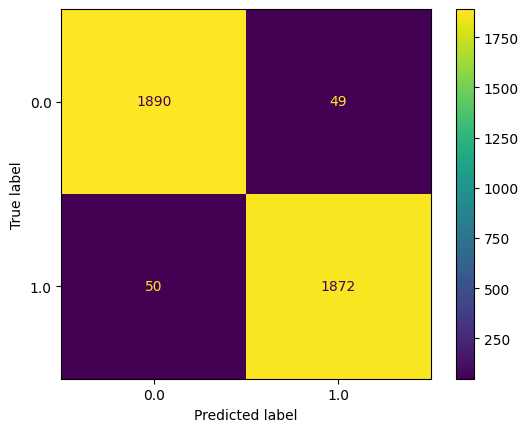

In [80]:
confusion_matrix_plot(x_test, 'prediction', xgb)